In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import scipy.stats as stats

# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

# Source Data from https://academictorrents.com/details/c398a571976c78d346c325bd75c47b82edf6124e
# Only the r/Progresspics subreddit

df = pd.read_pickle('df.pkl')

df['age'] = df['age'].astype(float)

row_filter = (
    ((df['loss_rate'] < 10) & (df['loss_rate'] > 0)) 
    & (df['gender'].str.contains('M') | df['gender'].str.contains('F'))
    & (df['timeframe_in_weeks'] > 4)
    & (df['calculated_lost_weight'].between(0,500))
    & (df['height_in_inches'].between(36,100))
    )
plot_df = df.loc[row_filter, :]
#color_map = plt.cm.jet
color_map = plt.cm.viridis

#plot_df['loss_rate'].count()

In [3]:
#plot_df.to_csv('ProgressPics_Parsed_Data.csv')

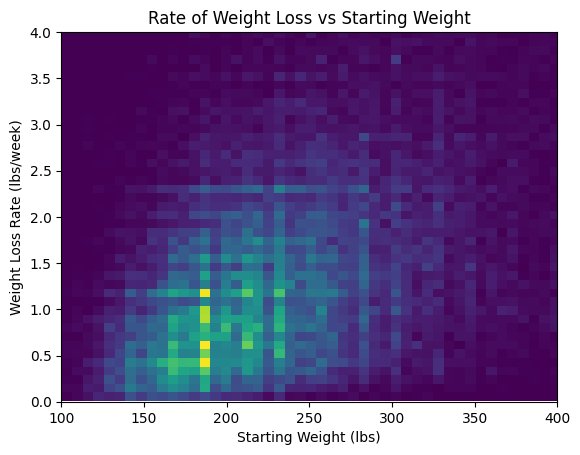

In [11]:
#color_map = plt.cm.jet
color_map = plt.cm.viridis

fig,axes = plt.subplots()

#plt.style.use('ggplot')

y_limits=(0,4)
y_label='Weight Loss Rate (lbs/week)'
# Graph 1
hb1 = axes.hist2d(
    x=plot_df['converted_start_weight'],
    y=plot_df['loss_rate'],
    bins=(100,100),
    cmap = color_map,
)
axes.set(title='Rate of Weight Loss vs Starting Weight')
axes.set(xlim=(100,400))
axes.set(ylim=y_limits)
axes.set(ylabel=y_label)
axes.set(xlabel='Starting Weight (lbs)')
#fig.colorbar(hb1, ax=axes[0,0])

plt.show()

AttributeError: 'tuple' object has no attribute 'get_array'

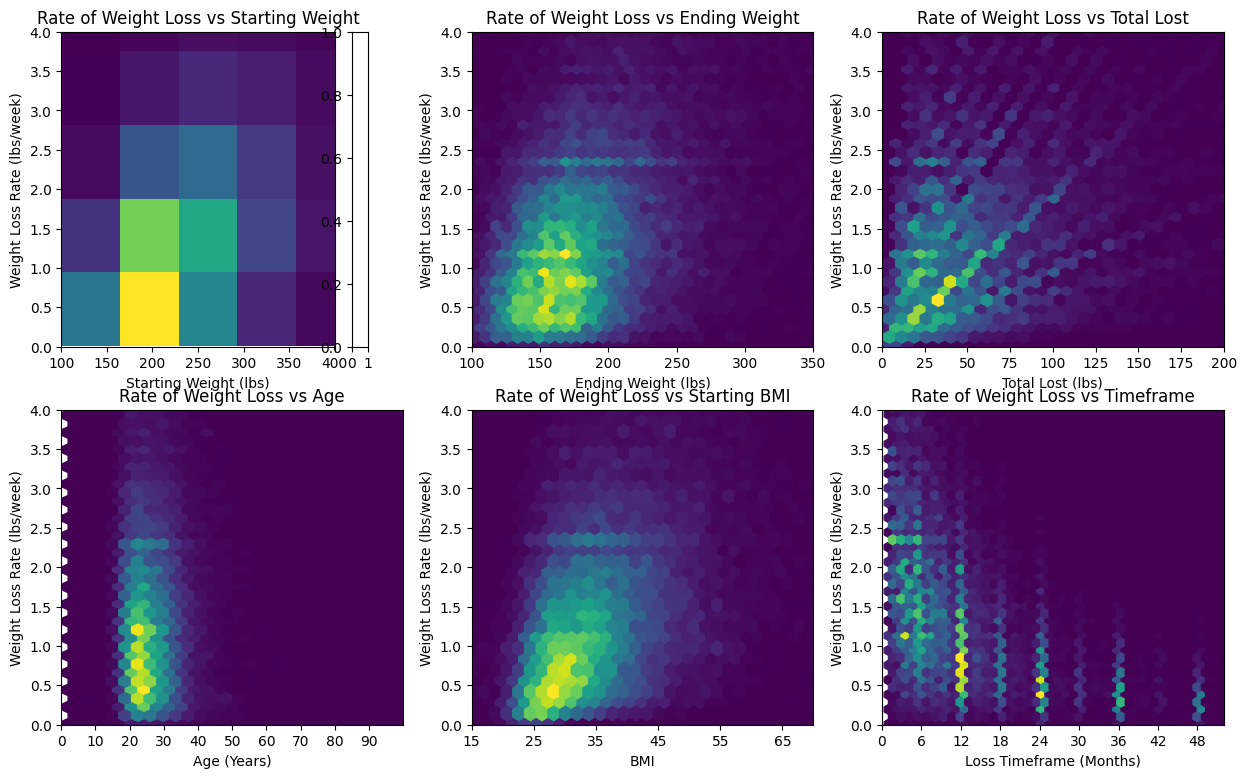

In [18]:
#color_map = plt.cm.jet
color_map = plt.cm.viridis

fig,axes = plt.subplots(2, 3, figsize=(15, 9))

#plt.style.use('ggplot')

y_limits=(0,4)
y_label='Weight Loss Rate (lbs/week)'
# Graph 1
hb1 = axes[0,0].hexbin(
    x=plot_df['converted_start_weight'],
    y=plot_df['loss_rate'],
    gridsize=70,
    cmap = color_map,
)
axes[0,0].set(title='Rate of Weight Loss vs Starting Weight')
axes[0,0].set(xlim=(100,400))
axes[0,0].set(ylim=y_limits)
axes[0,0].set(ylabel=y_label)
axes[0,0].set(xlabel='Starting Weight (lbs)')
#fig.colorbar(hb1, ax=axes[0,0])

hb2 = axes[0,1].hexbin(
    x=plot_df['converted_end_weight'],
    y=plot_df['loss_rate'],
    gridsize=70,
    cmap = color_map,
)
axes[0,1].set(title='Rate of Weight Loss vs Ending Weight')
axes[0,1].set(xlim=(100,350))
axes[0,1].set(ylim=y_limits)
axes[0,1].set(ylabel=y_label)
axes[0,1].set(xlabel='Ending Weight (lbs)')

hb3 = axes[0,2].hexbin(
    x=plot_df['calculated_lost_weight'],
    y=plot_df['loss_rate'],
    cmap = color_map,
    gridsize=70,
)
axes[0,2].set(title='Rate of Weight Loss vs Total Lost')
axes[0,2].set(xlim=(0,200))
axes[0,2].set(ylim=y_limits)
axes[0,2].set(ylabel=y_label)
axes[0,2].set(xlabel='Total Lost (lbs)')

hb4 = axes[1,0].hexbin(
    x=plot_df['age'],
    y=plot_df['loss_rate'],
    cmap = color_map,
    gridsize=75
)
x_limits=(0,100)
axes[1,0].set(title='Rate of Weight Loss vs Age')
axes[1,0].set(xbound=x_limits) # Trouble
axes[1,0].set(ylim=y_limits)
axes[1,0].set(ylabel=y_label)
axes[1,0].set(xlabel='Age (Years)')
axes[1,0].set_xticks(range(x_limits[0],x_limits[1],10))

hb5 = axes[1,1].hexbin(
    x=plot_df.loc[plot_df['Starting_BMI'].notna(),'Starting_BMI'],
    y=plot_df.loc[plot_df['Starting_BMI'].notna(), 'loss_rate'],
    cmap = color_map,
    gridsize=60
)
x_limits=(15,70)
axes[1,1].set(title='Rate of Weight Loss vs Starting BMI')
axes[1,1].set(xlim=x_limits)
axes[1,1].set(ylim=y_limits)
axes[1,1].set(ylabel=y_label)
axes[1,1].set(xlabel='BMI')
axes[1,1].set_xticks(range(x_limits[0],x_limits[1],10))

factor = 25
grid_size = (12*factor,2*factor)
hb6 = axes[1,2].hexbin(
    x=plot_df.loc[:,'timeframe_in_weeks'] / 4.3,
    y=plot_df.loc[:, 'loss_rate'],
    cmap = color_map,
    gridsize=grid_size 
)
x_limits=(0,52)
axes[1,2].set(title='Rate of Weight Loss vs Timeframe')
axes[1,2].set(xlim=x_limits)
axes[1,2].set(ylim=y_limits)
axes[1,2].set(ylabel=y_label)
axes[1,2].set(xlabel='Loss Timeframe (Months)')
axes[1,2].set_xticks(np.arange(x_limits[0],x_limits[1],6))

plt.colorbar(hb1, ax=axes[0,0], label='count')
plt.colorbar(hb2, ax=axes[0,1], label='count')
plt.colorbar(hb3, ax=axes[0,2], label='count')
plt.colorbar(hb4, ax=axes[1,0], label='count')
plt.colorbar(hb5, ax=axes[1,1], label='count')
plt.colorbar(hb6, ax=axes[1,2], label='count')


plt.minorticks_off()
plt.tight_layout()


plt.savefig('ProgressPics_Charts.png', dpi=360)

plt.show()

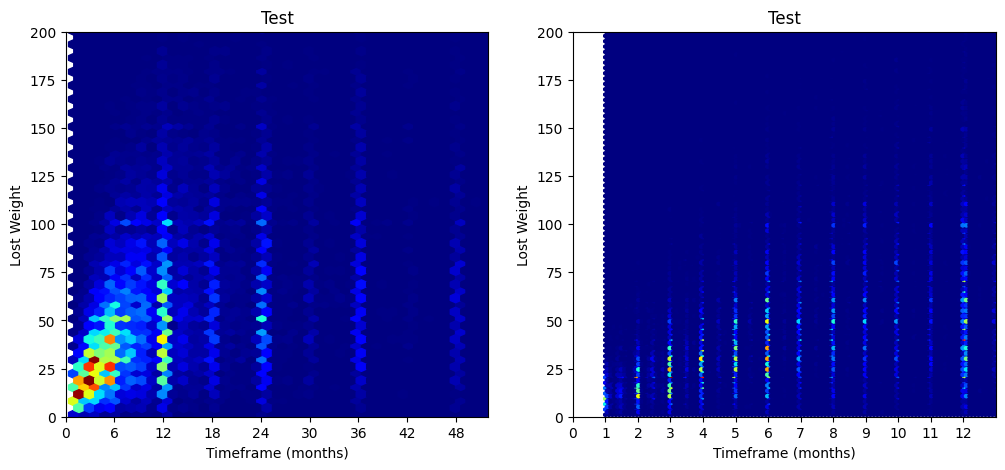

In [7]:
fig,ax = plt.subplots(1,2, figsize=(12,5))

y_limits=(0,200)
x_limits=(0,52)
y_label='Lost Weight'
# Graph 1
hb1 = ax[0].hexbin(
    x=plot_df.loc[:,'timeframe_in_weeks'] / 4.3,
    y=plot_df['calculated_lost_weight'],
    gridsize=(300,70),
    cmap = color_map,
)
ax[0].set(title='Test')
ax[0].set(xlim=x_limits)
ax[0].set(ylim=y_limits)
ax[0].set(ylabel=y_label)
ax[0].set(xlabel='Timeframe (months)')
ax[0].set_xticks(np.arange(x_limits[0],x_limits[1],6))

y_limits=(0,200)
x_limits=(0,13)
factor = 6
y_label='Lost Weight'
# Graph 1
hb1 = ax[1].hexbin(
    x=plot_df.loc[:,'timeframe_in_weeks'] / 4.3,
    y=plot_df['calculated_lost_weight'],
    gridsize=(600*factor,30*factor),
    cmap = color_map,
)
ax[1].set(title='Test')
ax[1].set(xlim=x_limits)
ax[1].set(ylim=y_limits)
ax[1].set(ylabel=y_label)
ax[1].set(xlabel='Timeframe (months)')
ax[1].set_xticks(np.arange(x_limits[0],x_limits[1],1))

plt.show()

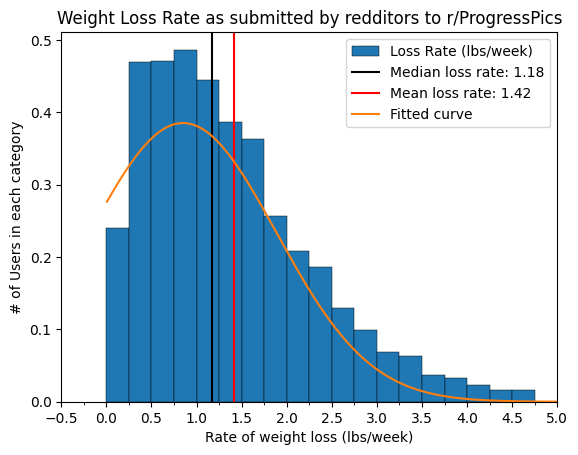

In [8]:
bin_step = 0.25
x_min = 0
x_max = 5

padding = 0.5

bins_2 = np.histogram_bin_edges(plot_df['loss_rate'], bins = 'auto')

plot2 = plot_df['loss_rate'].plot(
    kind='hist',
    column='loss_rate',
    #bins = bins_2,
    bins=np.arange(x_min, x_max, bin_step),
    title='Weight Loss Rate as submitted by redditors to r/ProgressPics',
    histtype = 'bar',
    edgecolor = 'black',
    linewidth = 0.32,
    label = 'Loss Rate (lbs/week)',
    density=True
)

plot2.axvline(plot_df['loss_rate'].median(), color='black', label = f'Median loss rate: {plot_df["loss_rate"].median():.2f}')
plot2.axvline(plot_df['loss_rate'].mean(), color='red', label = f'Mean loss rate: {plot_df["loss_rate"].mean():.2f}')
#plot2.axvline(plot_df.mode()['loss_rate'][0], color='red', label = f'mode loss rate: {plot_df.mode()["loss_rate"][0]:.2f}')

plot2.set_xlabel('Rate of weight loss (lbs/week)')
plot2.set_ylabel('# of Users in each category')

# Calculating mean and Stdev of AGW
df_mean = np.mean(plot_df["loss_rate"])
df_std = np.std(plot_df["loss_rate"])
 
# Calculating probability density function (PDF)
pdf = stats.norm.pdf(plot_df["loss_rate"].sort_values(), .85, df_std)

# Drawing a graph
plt.plot(plot_df["loss_rate"].sort_values(), pdf, label='Fitted curve')

plot2.xaxis.set_major_locator(MultipleLocator(.5))
plot2.xaxis.set_minor_locator(MultipleLocator(.25))

plot2.axes.set_xbound(-padding, x_max)

plot2.legend()
plt.show()


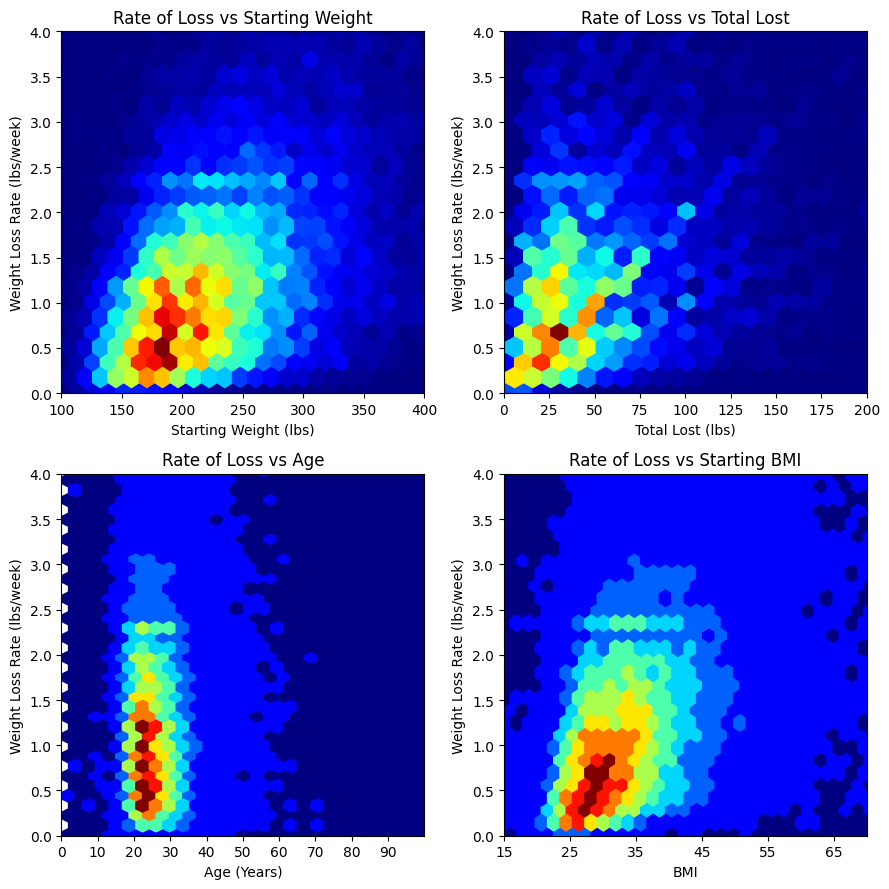

In [9]:
# [np.arange(100,500,25), np.arange(0,6,0.1)]
fig,axes = plt.subplots(2, 2, figsize=(9, 9))

#plt.style.use('ggplot')

y_limits=(0,4)
y_label='Weight Loss Rate (lbs/week)'

hb1 = axes[0,0].hexbin(
    x=plot_df['converted_start_weight'],
    y=plot_df['loss_rate'],
    gridsize=50,
    cmap = color_map,
)
axes[0,0].set(title='Rate of Loss vs Starting Weight')
axes[0,0].set(xlim=(100,400))
axes[0,0].set(ylim=y_limits)
axes[0,0].set(ylabel=y_label)
axes[0,0].set(xlabel='Starting Weight (lbs)')
#fig.colorbar(hb1, ax=axes[0,0])

hb2 = axes[0,1].hexbin(
    x=plot_df['calculated_lost_weight'],
    y=plot_df['loss_rate'],
    cmap = color_map,
    gridsize=50,
)
axes[0,1].set(title='Rate of Loss vs Total Lost')
axes[0,1].set(xlim=(0,200))
axes[0,1].set(ylim=y_limits)
axes[0,1].set(ylabel=y_label)
axes[0,1].set(xlabel='Total Lost (lbs)')
#fig.colorbar(hb2, ax=axes[0,1], label='count')

hb3 = axes[1,0].hexbin(
    x=plot_df['age'],
    y=plot_df['loss_rate'],
    cmap = color_map,
    bins=10,
    gridsize=75
)
x_limits=(0,100)
axes[1,0].set(title='Rate of Loss vs Age')
axes[1,0].set(xbound=x_limits) # Trouble
axes[1,0].set(ylim=y_limits)
axes[1,0].set(ylabel=y_label)
axes[1,0].set(xlabel='Age (Years)')
axes[1,0].set_xticks(range(x_limits[0],x_limits[1],10))

hb4 = axes[1,1].hexbin(
    x=plot_df.loc[plot_df['Starting_BMI'].notna(),'Starting_BMI'],
    y=plot_df.loc[plot_df['Starting_BMI'].notna(), 'loss_rate'],
    bins=10,
    cmap = color_map,
    gridsize=60
)
x_limits=(15,70)
axes[1,1].set(title='Rate of Loss vs Starting BMI')
axes[1,1].set(xlim=x_limits)
axes[1,1].set(ylim=y_limits)
axes[1,1].set(ylabel=y_label)
axes[1,1].set(xlabel='BMI')
axes[1,1].set_xticks(range(x_limits[0],x_limits[1],10))

#fig.colorbar(hb2, ax=axes[0,1], label='count')

plt.minorticks_off()
plt.tight_layout()

plt.show()

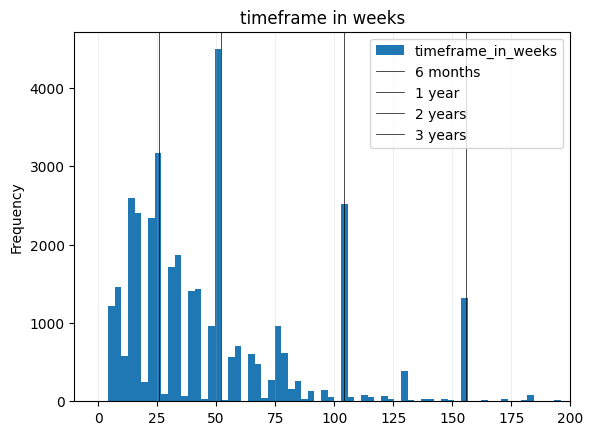

In [10]:
plot = plot_df['timeframe_in_weeks'].plot(
    kind='hist',
    column='timeframe_in_weeks',
    bins=np.histogram_bin_edges(plot_df['timeframe_in_weeks'], bins = 'auto'),
    title='timeframe in weeks',
)
plot.axes.grid(visible=True,which='both', axis='x', alpha=0.2)
plot.axes.set_xbound(-10,200)

linewidth=0.5
plot.axvline(6*4.3, color='black', label = '6 months', linewidth=linewidth)
plot.axvline(52, color='black', label = '1 year', linewidth=linewidth)
plot.axvline(52*2, color='black', label = '2 years', linewidth=linewidth)
plot.axvline(52*3, color='black', label = '3 years', linewidth=linewidth)

plot.legend()
plt.show()

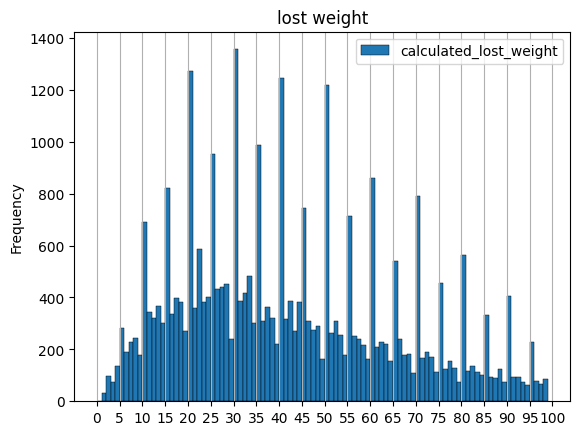

In [11]:
plot = plot_df.plot(
    kind='hist',
    column='calculated_lost_weight',
    bins=range(0,100,1),
    title='lost weight',
    edgecolor = 'black',
    linewidth = 0.32,
)

plot.xaxis.set_major_locator(MultipleLocator(5))
plot.xaxis.set_minor_locator(MultipleLocator(10))

plot.axes.grid(visible=True, which='both', axis='x')
plt.show()


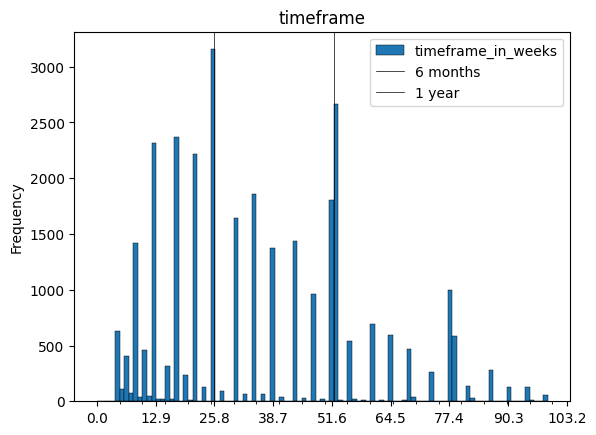

In [12]:
plot = plot_df.plot(
    kind='hist',
    column='timeframe_in_weeks',
    bins=range(0,100,1),
    title='timeframe',
    edgecolor = 'black',
    linewidth = 0.32,
)

plot.xaxis.set_major_locator(MultipleLocator(4.3*3))
plot.xaxis.set_minor_locator(MultipleLocator(5))

plot.axvline(6*4.3, color='black', label = '6 months', linewidth=linewidth)
plot.axvline(52, color='black', label = '1 year', linewidth=linewidth)


plt.legend()
plt.show()

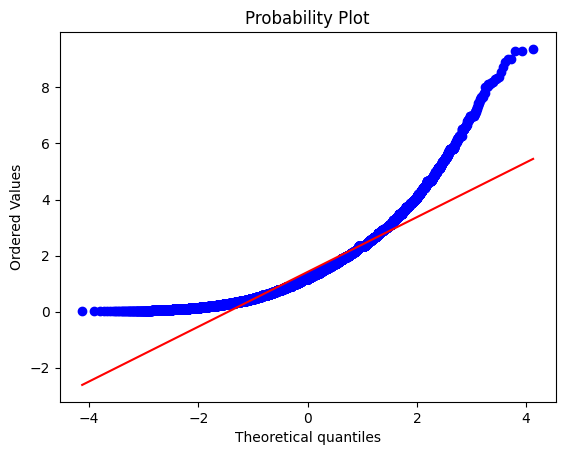

In [13]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(plot_df['loss_rate'], dist="norm", plot=pylab)
pylab.show()